In [1]:
from sklearn.metrics import normalized_mutual_info_score as nmi
import pickle
import os
import seaborn as sns; sns.set()
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib

3260 36
3044 39
3267 36
3120 24
2993 21
3678 22
3241 34
3290 25
3759 37
3278 25


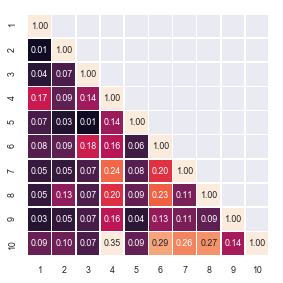

In [18]:
matplotlib.rcParams.update({'font.size': 8})

BASEDIR='output/brfl'

gene_set = set()

quantity = [36, 39, 36, 24, 21, 22, 34, 25, 37, 25]

i = 0
for file in os.listdir(BASEDIR):
    if 'selected_genes' in file and '_10_fold' in file:
        print(len(pd.read_csv(os.path.join(BASEDIR, file), sep=',')['gene'].tolist()), quantity[i])
        genes = pd.read_csv(os.path.join(BASEDIR, file), sep=',')['gene'].tolist()[:quantity[i]]
        gene_set = gene_set.union(set(genes))
        i += 1
            
gene_set = list(gene_set)

flags = {}

i = 0
for file in os.listdir(BASEDIR):
    if 'selected_genes' in file  and '_10_fold' in file:
        current_gene_set = pd.read_csv(os.path.join(BASEDIR, file), sep=',')['gene'].tolist()[:quantity[i]]
        flags[i] = [int(g in current_gene_set) for g in gene_set]
        i += 1

result = {'src': [], 'dst': [], 'NMI': []}
            
for src in range(10):
    for dst in range(src, 10):
        result['src'].append(src)
        result['dst'].append(dst)
        result['NMI'].append(nmi(flags[src], flags[dst], average_method='arithmetic'))
        
nmis = pd.DataFrame(result).set_index(['src', 'dst']).unstack(level=0)

fig, ax = plt.subplots(1, 1, figsize = (5, 4), dpi=80)

lab = [i + 1 for i in range(10)]

sns.heatmap(nmis, vmin=0.0, 
            vmax=max([o for o in result['NMI'] if o < 1]), 
            square=True, 
            linewidths=.5, 
            annot=True, 
            xticklabels=lab, 
            yticklabels=lab,
            fmt='.2f',
            cbar=False);

ax.set_ylabel('')    
ax.set_xlabel('')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.savefig("images/nmi.pdf", bbox_inches='tight')

plt.show()

In [3]:
import numpy as np
[np.mean([i for i in result['NMI'] if i < 1]),
np.min([i for i in result['NMI'] if i < 1]),
np.max([i for i in result['NMI'] if i < 1])]
[i for i in result['NMI'] if i < 1]

[0.014069608997472342,
 0.039218215128767685,
 0.17380848199101373,
 0.06673003594180414,
 0.07954794720912357,
 0.05210158476355411,
 0.04890571951637903,
 0.03365908579999211,
 0.09401986931532652,
 0.0705132794573483,
 0.0853576582389131,
 0.03261336536911106,
 0.0862720255744979,
 0.050091264212906744,
 0.12689050410785685,
 0.045341470055542,
 0.09806956807092317,
 0.13836915083418375,
 0.014472830408900704,
 0.17717325708826548,
 0.07096388882934856,
 0.06957393112291818,
 0.0665118547384221,
 0.06957393112291818,
 0.13638269067103992,
 0.16052404708184012,
 0.23981131585827017,
 0.19659566979872614,
 0.16344786225828534,
 0.35134022513548147,
 0.06019525117467178,
 0.07902657391824461,
 0.09167451139536652,
 0.04058702135482146,
 0.09167451139536652,
 0.19902885541161452,
 0.23457657841284746,
 0.13108870758353736,
 0.286849899282942,
 0.11036806862072988,
 0.107653215947812,
 0.2613337872569171,
 0.08663162527955877,
 0.2719333075022393,
 0.14499226671132878]

In [4]:
intersection, union = None, None
i = 0
for file in os.listdir(BASEDIR):
    if 'selected_genes' in file and '_10_fold' in file:
        genes = set(pd.read_csv(os.path.join(BASEDIR, file), sep=',')['gene'].tolist()[:quantity[i]])
        intersection = genes if intersection is None else intersection.intersection(genes)
        union = genes if union is None else union.union(genes)
        
print('Intersection gene set {}'.format(len(intersection)))
      
for g in intersection:
    print('{}'.format(g))
    
print('\nUnion gene set {}'.format(len(union)))

for g in union:
    print('{}'.format(g))

Intersection gene set 10
ENSG00000173818
ENSG00000101222
ENSG00000257698
ENSG00000163001
ENSG00000207231
ENSG00000184154
ENSG00000185621
ENSG00000198189
ENSG00000174628
ENSG00000165698

Union gene set 127
ENSG00000188312
ENSG00000166598
ENSG00000198542
ENSG00000197102
ENSG00000101222
ENSG00000165997
ENSG00000242229
ENSG00000140104
ENSG00000150337
ENSG00000185621
ENSG00000065621
ENSG00000237181
ENSG00000215893
ENSG00000220793
ENSG00000100647
ENSG00000253782
ENSG00000167653
ENSG00000198189
ENSG00000046647
ENSG00000119917
ENSG00000165698
ENSG00000175445
ENSG00000153832
ENSG00000197557
ENSG00000010030
ENSG00000128581
ENSG00000102001
ENSG00000102032
ENSG00000163521
ENSG00000261126
ENSG00000168591
ENSG00000245149
ENSG00000260054
ENSG00000204147
ENSG00000261468
ENSG00000229272
ENSG00000212498
ENSG00000152380
ENSG00000188010
ENSG00000171914
ENSG00000226253
ENSG00000272922
ENSG00000013392
ENSG00000144134
ENSG00000141294
ENSG00000120685
ENSG00000153956
ENSG00000143479
ENSG00000110713
ENSG0000018

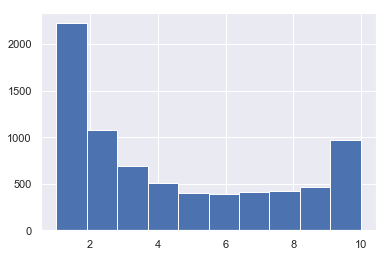

,frequency,pvalue
gene,,
ENSG00000163001,10,2.622777e-09
ENSG00000207231,10,3.033695e-08
ENSG00000198189,10,1.212019e-07
ENSG00000174628,10,2.360928e-07
ENSG00000165698,10,5.993636e-07
ENSG00000257698,10,8.355579e-07
ENSG00000101222,10,2.142252e-06
ENSG00000184154,10,2.143678e-06
ENSG00000173818,10,4.040401e-06


In [5]:
from collections import Counter

BASEDIR='output/brfl'

gene_list = []

for file in os.listdir(BASEDIR):
    if 'selected_genes' in file and '_10_fold' in file:
        genes = pd.read_csv(os.path.join(BASEDIR, file), sep=',')['gene'].tolist()
        gene_list += genes

selection = pd.DataFrame(dict(Counter(gene_list)), index=['frequency']).T.reset_index()
selection.columns = ['gene', 'frenquency']

i = 0 
for file in os.listdir(BASEDIR):
    if 'selected_genes' in file and '_10_fold' in file:
        i += 1
        tmp = pd.read_csv(os.path.join(BASEDIR, file), sep=',')
        del tmp['Unnamed: 0']
        tmp.columns = ['gene', 'pvalue_{}'.format(i)]
        selection = selection.merge(tmp, on='gene', how='outer')
        
selection = selection.set_index('gene')
min_pvalues = pd.DataFrame(selection.iloc[:,1:].fillna(1).apply(lambda x: min(x.tolist()), axis=1))
selection = selection.iloc[:,[0]].join(min_pvalues)
selection.columns = ['frequency', 'pvalue']

plt.show(pd.Series(selection['frequency'].tolist()).hist());

selection = selection.sort_values(['frequency', 'pvalue'], ascending = (False, True))

selection.to_csv('output/brfl/genes_order_by_frequency_and_pvalue.csv', sep=',', index=True)

display(selection.head(15))

<Figure size 1152x432 with 0 Axes>

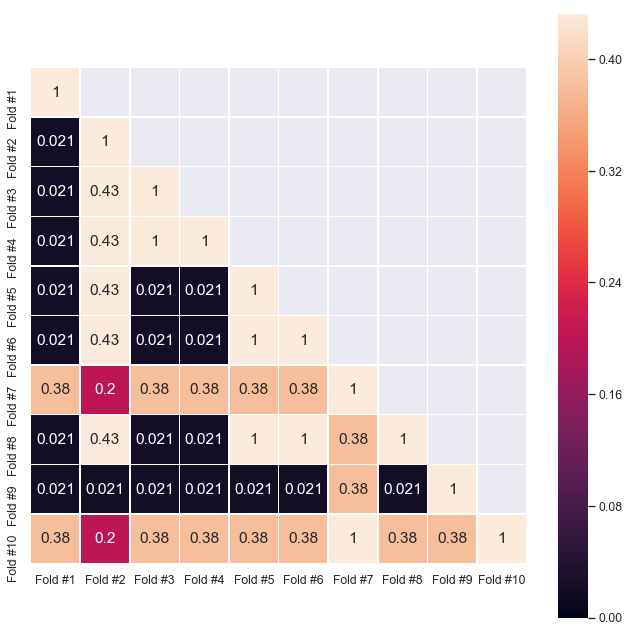

In [6]:
BASEDIR='output/brfl'

gene_set = set()

for file in os.listdir(BASEDIR):
    if 'selected_feats' in file:
        genes = pd.read_csv(os.path.join(BASEDIR, file), sep=',')['gene'].tolist()
        gene_set = gene_set.union(set(genes))
            
gene_set = list(gene_set)

flags = {}

i = 0

for file in os.listdir(BASEDIR):
    if 'selected_feats' in file:
        current_gene_set = pd.read_csv(os.path.join(BASEDIR, file), sep=',')['gene'].tolist()
        flags[i] = [int(g in current_gene_set) for g in gene_set]
        i += 1

result = {'src': [], 'dst': [], 'NMI': []}
            
for src in range(10):
    for dst in range(src, 10):
        result['src'].append(src)
        result['dst'].append(dst)
        result['NMI'].append(nmi(flags[src], flags[dst], average_method='arithmetic'))
        
nmis = pd.DataFrame(result).set_index(['src', 'dst']).unstack(level=0)

plt.figure(figsize=(16, 6))

fig, ax = plt.subplots(1, 1, figsize = (10, 10), dpi=80)

lab = ['Fold #{}'.format(i + 1) for i in range(10)]

sns.heatmap(nmis, vmin=0.0, vmax=max([o for o in result['NMI'] if o < 1]), square=True, linewidths=.5, annot=True, xticklabels=lab, yticklabels=lab);

ax.set_ylabel('')    
ax.set_xlabel('')

plt.show()

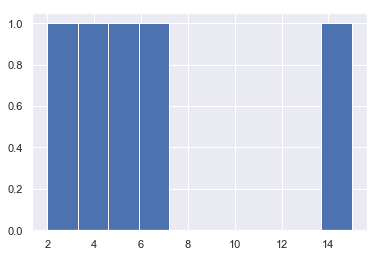

,frequency,pvalue
clinical,,
first_line_transplant,15,4.850039e-07
family_cancer_unk,6,6.825910e-05
hemoglobin,5,5.893717e-05
age,4,3.204162e-04
race_other,2,3.600494e-04


In [7]:
from collections import Counter

BASEDIR='output/brfl'

gene_list = []

for file in os.listdir(BASEDIR):
    if 'selected_feats' in file:
        genes = pd.read_csv(os.path.join(BASEDIR, file), sep=',')['gene'].tolist()
        gene_list += genes

selection = pd.DataFrame(dict(Counter(gene_list)), index=['frequency']).T.reset_index()
selection.columns = ['clinical', 'frenquency']

i = 0 
for file in os.listdir(BASEDIR):
    if 'selected_feats' in file:
        i += 1
        tmp = pd.read_csv(os.path.join(BASEDIR, file), sep=',')
        del tmp['Unnamed: 0']
        tmp.columns = ['clinical', 'pvalue_{}'.format(i)]
        selection = selection.merge(tmp, on='clinical', how='outer')
        
selection = selection.set_index('clinical')
min_pvalues = pd.DataFrame(selection.iloc[:,1:].fillna(1).apply(lambda x: min(x.tolist()), axis=1))
selection = selection.iloc[:,[0]].join(min_pvalues)
selection.columns = ['frequency', 'pvalue']

plt.show(pd.Series(selection['frequency'].tolist()).hist());

selection = selection.sort_values(['frequency', 'pvalue'], ascending = (False, True))

selection.to_csv('output/brfl/clinical_order_by_frequency_and_pvalue.csv', sep=',', index=True)

selection